In [1]:
from openai import OpenAI
from github import Github
from dotenv import load_dotenv
from collections import defaultdict
from bs4 import BeautifulSoup
from IPython.display import Image

import os
import json
import re
import requests

### Setting up environment

In [131]:
load_dotenv()

github_token = os.environ.get('GITHUB_ACCESS_TOKEN')

openai_api_key = os.environ.get('OPENAI_API_KEY')
openai_client = OpenAI(api_key=openai_api_key)

github_client = Github(github_token)

github_username = "LoganONeal"
github_user = github_client.get_user(github_username)

### Get the names of the user's public repos

In [132]:
repos = ""
repo_names = []

print("\nPublic Repositories:")
for repo in github_user.get_repos():
    repo_names.append(repo.name)

repos = ", ".join(repo_names)
print(repos)


Public Repositories:
2DRust, AllerGPS, ATPBetting, Audio-Visualizer, auto-cv-project, Auto-GPT, BookOmatic, chatGPT-browser-extension, clipninja, cool-papers, CreatePT, DinnerBell, doc-digest, EBike-Research, fitness-app-react, fitness_app, FRC-PC, FRC-Vision-2018, Full-Stack-Project-Etsy, GithubWrapped, go-noto-universal, GoogleLocationParser, hcs-rs, hexgrid, job-scraper, lake-app, lake-level-web-scraper, learning-pytorch, loganofneal, LoganOneal, loganoneal-old, loganoneal.github.io, loganoneal.github.io-old, material-kit-react, medflow, meiosis, mongo-graphql-react, nba_predictions, neuralpaint-server, notea, particles, PathFolio, PathWays, personal-website, powerlevel9k, project-based-learning, Punk-Picks, punkvision, python-game, react-graphql, realworld, RhymeFinder, semesterly, Simple-Ray-Trace, SmoothPunk, soft-ui-dashboard-react, speedchallenge, SplitIt, students, students-old, tradeup-app, tradeup-flask, tradeup-react, training-data-analyst, Vision-Light, Visual-Pi, youtube

### Get the user's three most common languages

In [133]:
language_usage = defaultdict(int)

for repo in github_user.get_repos():
    languages = repo.get_languages()
    
    for lang, bytes_used in languages.items():
        language_usage[lang] += bytes_used
    
# Sort the dictionary based on bytes used
sorted_language_usage = dict(sorted(language_usage.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
for lang, bytes_used in sorted_language_usage.items():
    print(f"{lang}: {bytes_used} bytes")
    
# Get the three most common languages
top_language_keys = list(sorted_language_usage.keys())[:3]

print(top_language_keys)

favorite_languages = ", ".join(top_language_keys)

JavaScript: 27632512 bytes
Jupyter Notebook: 9083425 bytes
HTML: 6648725 bytes
Python: 5190289 bytes
CSS: 2990660 bytes
SCSS: 1710471 bytes
RPC: 1156280 bytes
TypeScript: 751361 bytes
Shell: 480658 bytes
Java: 381629 bytes
Dart: 338694 bytes
Rust: 297195 bytes
C++: 224368 bytes
PHP: 215365 bytes
C#: 98816 bytes
GLSL: 95466 bytes
Ruby: 89343 bytes
Less: 86826 bytes
C: 82718 bytes
CMake: 26780 bytes
Cuda: 23081 bytes
Dockerfile: 20648 bytes
Makefile: 20531 bytes
Jinja: 12120 bytes
Astro: 3557 bytes
Handlebars: 3292 bytes
Objective-C++: 3035 bytes
Swift: 2788 bytes
CoffeeScript: 2532 bytes
Mako: 1036 bytes
TSQL: 770 bytes
Batchfile: 698 bytes
Objective-C: 403 bytes
PigLatin: 393 bytes
Kotlin: 270 bytes
Procfile: 206 bytes
PowerShell: 113 bytes
R: 68 bytes
['JavaScript', 'Jupyter Notebook', 'HTML']


### Curating a GPT prompt for the spirit animal

In [134]:
MODEL = "gpt-4"
system_messages = [
    {"role": "system", "content": "You provide interesting and obscure spirit animals for developers based on their projects. Be creative."},
    {"role": "system", "content": "You provide a single animal as a response in one word."},
]
user_message = {"role": "user", "content": f"My projects are the following: {repos}\nMy favorite programming languages are the following: {favorite_languages}\nBased on this information, provide me with an interesting spirit animal."}

response = openai_client.chat.completions.create(
    model=MODEL,
    messages=system_messages + [user_message],
    temperature=1,
)

print(response)

spirit_animal = response.choices[0].message.content
print(spirit_animal)

ChatCompletion(id='chatcmpl-8OreiNkmQkxLEka8ptvrb39UPcAwO', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='Opabinia', role='assistant', function_call=None, tool_calls=None))], created=1700936816, model='gpt-4-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=3, prompt_tokens=366, total_tokens=369))
Opabinia


### Get user's README contents as keywords

In [135]:
def remove_markdown_images_and_links(text):
    text = re.sub(r'\s*!\[.*?\]\(.*?\)\s*', ' ', text)
    text = re.sub(r'\s*\[.*?\]\(.*?\)\s*', ' ', text)

    return text

github_keywords = ""

try:
    repo = github_user.get_repo(github_username)
    readme = repo.get_readme()
    readme_content = readme.decoded_content.decode('utf-8')

    soup = BeautifulSoup(readme_content, 'html.parser')

    # Remove unnecessary tags or attributes
    for tag in soup(['h3', 'h2', 'img', 'a', 'br']):
        tag.unwrap()

    cleaned_html = str(soup)

    github_readme_cleaned = remove_markdown_images_and_links(cleaned_html)

    print(github_readme_cleaned)

    MODEL = "gpt-3.5-turbo"
    system_messages = [
        {"role": "system", "content": "You should only list keywords for the user."},
    ]
    user_message = {"role": "user", "content": f"Provide five keywords for me with the following description: {github_readme_cleaned}"}

    response = openai_client.chat.completions.create(
        model=MODEL,
        messages=system_messages + [user_message],
        temperature=0,
    )

    github_keywords = response.choices[0].message.content
    print(github_keywords)
    
except Exception as e:
    pass


Hi there, I'm Logan 👋


I'm a CS Student at the University of Tennessee!
 
I am interested in software development and working on exciting and innovative projects. My interests include machine learning, web development, and mobile development. 

### 🤝 Lets Connect!

-  

- 💬 If you have any questions/feedback, please reach out!

## 🔭 I'm currently working on

- Doc-digest, a platform for accelerated learning using text to speech and ML summarization tools

## 💼 Technical Skills                ## 📈 GitHub Stats 
CS Student, University of Tennessee, software development, machine learning, web development, mobile development


### Use DALL-E to create an image based on the user's spirit animal

In [138]:
prompt = f"Create a realistic image of a software developer {spirit_animal}. "

if github_user.bio != "":
    prompt += f"Bio: {github_user.bio}. "
    
if github_keywords != "":
    prompt += f"Keywords: {github_keywords}."

response = openai_client.images.generate(
  model="dall-e-3",
  prompt=prompt,
  size="1024x1024",
  quality="standard",
  n=1,
)

print(response)
image_url = response.data[0].url
print(image_url)

ImagesResponse(created=1700936973, data=[Image(b64_json=None, revised_prompt='Generate an image of an opabinia, a prehistoric marine animal, represented as a creative software developer. This digitally enhanced creature should wear modern day developer accessories like headphones and perhaps a hoodie. It is surrounded by symbols and elements related to computer science, such as algorithms, binary numbers, coding languages and bugs. Elements of University of Tennessee, like its colors or mascot, should subtly be included in the scene. Areas of software development, machine learning, web, and mobile development can be represented indirectly by specific icons or diagrams.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-e0QyTAGMXOcLV136VR2ojnzV/user-yzfEfDFzjyl0FzAi4rNNmkzW/img-JrMdZ00CO14TJJOC2XxUmkVD.png?st=2023-11-25T17%3A29%3A33Z&se=2023-11-25T19%3A29%3A33Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-

Image saved: tmp/k5XVLxAR6MjWQhsIjJg%3D.png


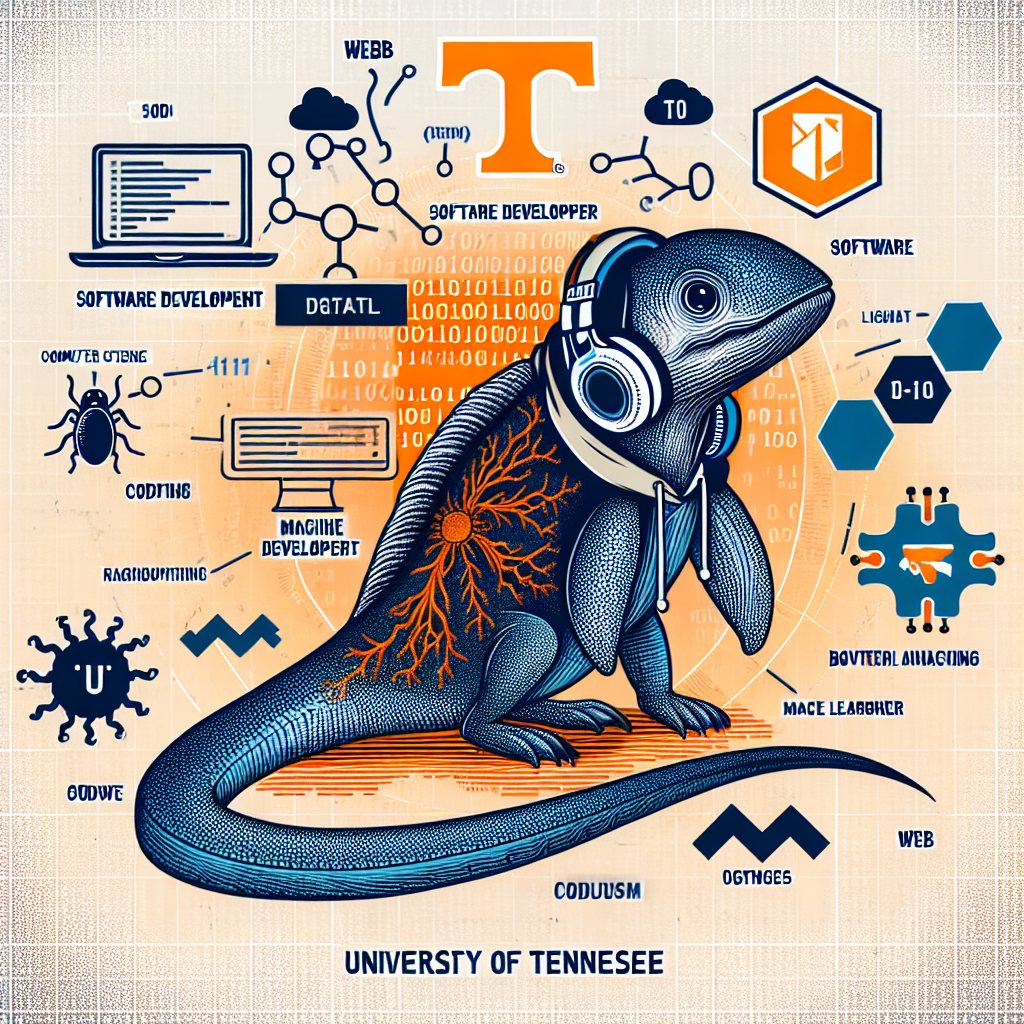

In [139]:
def download_and_save_image(img_src, save_folder):
    # Ensure the save folder exists
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    response = requests.get(img_src)

    if response.status_code == 200:
        img_filename = os.path.join(save_folder, os.path.basename(img_src))
        img_filename += '.png'

        # Save the image locally
        with open(img_filename, 'wb') as img_file:
            img_file.write(response.content)
        print(f"Image saved: {img_filename}")
        return img_filename
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")
        return ""

url = image_url
save_folder = "tmp"
filename = download_and_save_image(url, save_folder)

Image(filename= filename, width=600, height=600)